In [139]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


In [17]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [141]:

mnist_data = MNIST('../data', train=True, download=True, transform=transforms.ToTensor())

In [142]:
data_loader = DataLoader(mnist_data,
                         batch_size=25,
                         shuffle=False)

In [143]:

data_iter = iter(data_loader)
images, labels = data_iter.next()

(28, 28)
Label: tensor(1)


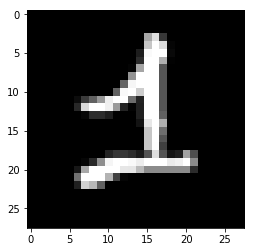

In [145]:

# matplotlibで1つ目のデータを可視化してみる
npimg = images[24].numpy()
npimg = npimg.reshape((28, 28))
print(npimg.shape)
plt.imshow(npimg, cmap='gray')
print('Label:', labels[24])

In [146]:
gridimg=torchvision.utils.make_grid(images, nrow=5, padding=0)


In [89]:
print(gridimg.shape)

torch.Size([3, 140, 140])


In [147]:
gridimg=gridimg.numpy()
print(gridimg.shape)

(3, 140, 140)


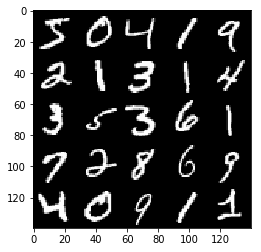

In [148]:
plt.imshow(np.transpose(gridimg, (1, 2, 0)))


In [149]:
# 訓練データとテストデータを用意
train_data = MNIST('../data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_data,
                         batch_size=4,
                         shuffle=True)
test_data = MNIST('../data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_data,
                         batch_size=4,
                         shuffle=False)

In [150]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 10) # 入力層から隠れ層へ
        self.l2 = nn.Linear(50, 10) # 隠れ層から出力層へ
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) # テンソルのリサイズ: (N, 1, 28, 28) --> (N, 784)
        x = self.l1(x)
        return x
    
net = Net()

In [151]:

# コスト関数と最適化手法を定義
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [152]:

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        # Variableに変換
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 勾配情報をリセット
        optimizer.zero_grad()
        
        # 順伝播
        outputs = net(inputs)
        
        # コスト関数を使ってロスを計算する
        loss = criterion(outputs, labels)
        
        # 逆伝播
        loss.backward()
        
        # パラメータの更新
        optimizer.step()
        
        running_loss += loss.data
        
        if i % 5000 == 4999:
            print('%d %d loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

1 5000 loss: 2.859
1 10000 loss: 1.899
1 15000 loss: 1.713
2 5000 loss: 1.648
2 10000 loss: 1.581
2 15000 loss: 1.570
3 5000 loss: 1.509
3 10000 loss: 1.512
3 15000 loss: 1.502
4 5000 loss: 1.470
4 10000 loss: 1.418
4 15000 loss: 1.486
5 5000 loss: 1.444
5 10000 loss: 1.408
5 15000 loss: 1.421
6 5000 loss: 1.379
6 10000 loss: 1.396
6 15000 loss: 1.431
7 5000 loss: 1.338
7 10000 loss: 1.379
7 15000 loss: 1.431
8 5000 loss: 1.386
8 10000 loss: 1.320
8 15000 loss: 1.394
9 5000 loss: 1.349
9 10000 loss: 1.345
9 15000 loss: 1.374
10 5000 loss: 1.361
10 10000 loss: 1.383
10 15000 loss: 1.297
Finished Training


In [153]:
correct = 0
total = 0
for data in test_loader:
    inputs, labels = data
    outputs = net(Variable(inputs))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy %d / %d = %f' % (correct, total, float(correct) / float(total)))

Accuracy 9236 / 10000 = 0.923600


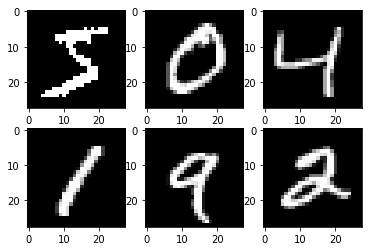

In [127]:
import torchvision.datasets as dset
mst_data=dset.MNIST(root='../data',download=True)

plt.subplot(231)
plt.imshow(mst_data[0][0].convert('1').convert('RGB'))
plt.subplot(232)
plt.imshow(mst_data[1][0].convert('RGB'))
plt.subplot(233)
plt.imshow(mst_data[2][0].convert('RGB'))
plt.subplot(234)
plt.imshow(mst_data[3][0].convert('RGB'))
plt.subplot(235)
plt.imshow(mst_data[4][0].convert('RGB'))
plt.subplot(236)
plt.imshow(mst_data[5][0].convert('RGB'))

In [116]:
print(mst_data[0][0].convert('RGB').size)

(28, 28)


In [140]:

print(mst_data[0][0])

<PIL.Image.Image image mode=L size=28x28 at 0x7F3975E2C5C0>


In [134]:
pd.DataFrame(mst_data)

TypeError: DataFrame constructor called with incompatible data and dtype: int() argument must be a string, a bytes-like object or a number, not 'Image'

In [130]:

mnist_data_skl = datasets.fetch_mldata('MNIST original',data_home='../data')

HTTPError: HTTP Error 502: Bad Gateway

In [133]:
pd.DataFrame(mnist_data_skl.data)

NameError: name 'mnist_data_skl' is not defined